Abgabe 3 Gruppe 9

# Aufgabe3_1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Abgabe3

/content/drive/MyDrive/Abgabe3


In [ ]:
import numpy as np
import os

In [ ]:
ROWS = 227    
COLUMNS =  198
LEVELS = 129

In [ ]:
input_file = '/content/drive/MyDrive/Abgabe3/images_for_reconstruction/whatisit_129x227x198_8bit.raw'


In [ ]:
npimg = np.fromfile(input_file, dtype=np.uint8)


In [ ]:
img = npimg.reshape((LEVELS, ROWS, COLUMNS))


In [ ]:
img.shape


(129, 227, 198)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Ordner erstellen für die Abspeicherung der Ergebnisse "Ergebnisse_Slices"
if not os.path.isdir('Ergebnisse_SLICES'):
    os.mkdir('Ergebnisse_SLICES')
if os.path.isdir('Ergebnisse_SLICES'):
    !rm -r 'Ergebnisse_SLICES'
    os.mkdir('Ergebnisse_SLICES')


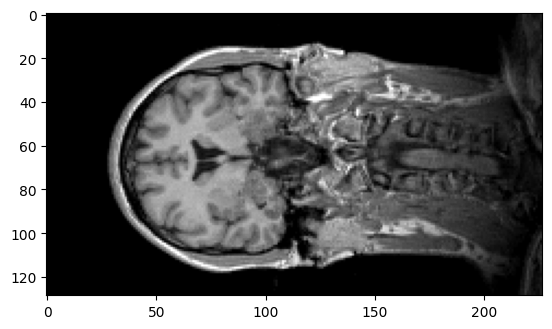

In [ ]:
#(xy)

try:
    output_file_xy = open('Ergebnisse_SLICES/xy.pgm', 'wb')
except (IOError):
    print ("Cannot open file “, filename, “Exiting … \n")
    sys.exit
    
pgmHeader = 'P5' + '\n' + str(COLUMNS) + '  ' + str(ROWS) + '  ' + str(255) + '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

output_file_xy.write(pgmHeader_byte)

img[:,:,99].tofile(output_file_xy)
output_file_xy.close()

plt.imshow(img[:,:,99], cmap = "gray")




In [ ]:
import cv2
cv2.imwrite('Ergebnisse_SLICES/xy.pgm', img[:,:,99]) 

True

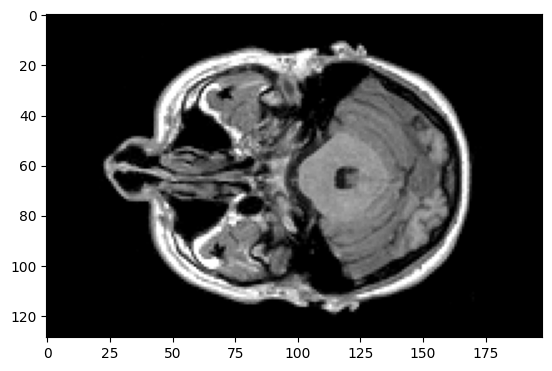

In [ ]:
# (xz)

try:
    output_file_xz = open('Ergebnisse_SLICES/xz.pgm', 'wb')
except (IOError):
    print ("Cannot open file “, filename, “Exiting … \n")
    sys.exit
    
pgmHeader = 'P5' + '\n' + str(COLUMNS) + '  ' + str(ROWS) + '  ' + str(255) + '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

output_file_xz.write(pgmHeader_byte)

img[:,113,:].tofile(output_file_xz)
output_file_xz.close()

plt.imshow(img[:,113,:], cmap = "gray")

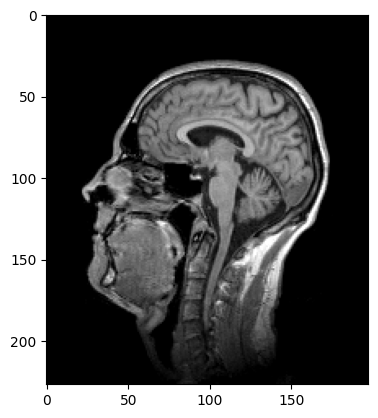

In [ ]:
#(yz)

try:
    output_file_yz = open('Ergebnisse_SLICES/yz.pgm', 'wb')
except (IOError):
    print ("Cannot open file “, filename, “Exiting … \n")
    sys.exit
    
pgmHeader = 'P5' + '\n' + str(COLUMNS) + '  ' + str(ROWS) + '  ' + str(255) + '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

output_file_yz.write(pgmHeader_byte)

img[64,:,:].tofile(output_file_yz)
output_file_yz.close()

plt.imshow(img[64,:,:], cmap = "gray")

In [ ]:
# Aufgabe 1.2

In [ ]:
# Maximum intensity projection
img_new = np.amax(img, axis=2)

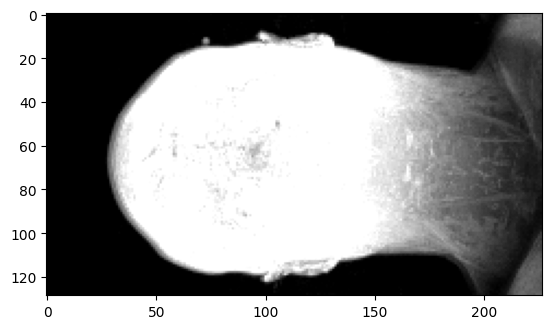

In [ ]:
plt.imshow(img_new, cmap="gray")


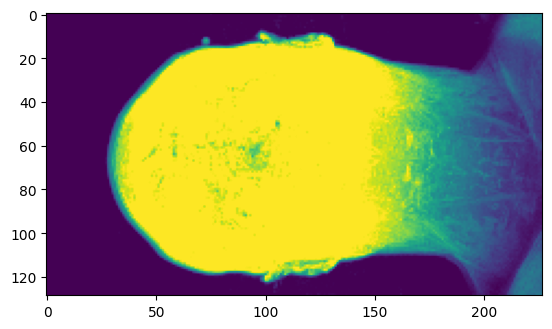

In [ ]:
plt.imshow(img_new)

# Aufgabe 3.2


In [6]:
import numpy as np
import os
import cv2
from PIL import Image
import scipy.ndimage as inter

ROWS = 138
COLUMNS = 138
LEVELS = 145

input_file = '/content/drive/MyDrive/Abgabe3/images_for_reconstruction/Artemisia_pollen_145x138x138_8bit.raw'

npimg = np.fromfile(input_file, dtype=np.uint8)
img = npimg.reshape((LEVELS, ROWS, COLUMNS))

def transformArray(img, ang):
    sourceArray = img
    targetArray = inter.interpolation.rotate(sourceArray, ang, axes=((2,1)))
    return targetArray

if not os.path.isdir('output'):
    os.mkdir('output')
if os.path.isdir('output'):
    !rm -r 'output'
    os.mkdir('output')

ang = 0
angle_step = 5
frame_count = 0
while ang <= 355:
    rotated_img = transformArray(img, ang)
    rotated_img = np.amax(rotated_img, axis=2)
    cv2.imwrite(f'output/movie_frame_{str(frame_count).zfill(3)}.pgm', rotated_img)
    ang += angle_step
    frame_count += 1

output_folder = 'output'

<ipython-input-6-fe7f0999765e>:18: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  targetArray = inter.interpolation.rotate(sourceArray, ang, axes=((2,1)))


In [8]:
path = "output" # Ordner wo die Bilder sich befinden 
num_of_images = len(os.listdir(path)) # Anzahl von Bilder
print(num_of_images)

72


**Hier wird das Video erstellt**

In [25]:
import os
import cv2

output_folder = 'output'
video_name = 'output_video_Aufgabe_2/movie_Frame_xxxx.avi'

if not os.path.exists(output_folder):
    print(f"Der Ausgabeordner '{output_folder}' existiert nicht.")
    exit()

if not os.path.exists('output_video_Aufgabe_2'):
    os.mkdir('output_video_Aufgabe_2')

# Liste der Bilddateien im Ausgabeordner abrufen
image_files = [f for f in sorted(os.listdir(output_folder)) if f.endswith('.pgm') and f.startswith('movie_frame_')]

# Überprüfen, ob mindestens ein Bild vorhanden ist
if len(image_files) == 0:
    print("Keine Bilder im Ausgabeordner gefunden.")
    exit()

# Erstellen des Video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 10
frame_size = cv2.imread(os.path.join(output_folder, image_files[0])).shape[:2][::-1]
video_writer = cv2.VideoWriter(video_name, fourcc, fps, frame_size)

# Durchlaufen und Hinzufügen aller Bilder zum Video
for image_file in image_files:
    image_path = os.path.join(output_folder, image_file)
    frame = cv2.imread(image_path)
    video_writer.write(frame)

# Freigeben des Video-Writers
video_writer.release()

print(f"Das Video wurde erfolgreich erstellt: {video_name}")


Das Video wurde erfolgreich erstellt: output_video_Aufgabe_2/movie_Frame_xxxTestNeu.avi


# Aufgabe3_3

In [14]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import os


In [15]:
# Pfade definieren
imgBuil3 = '/content/drive/MyDrive/Abgabe3/images_for_blending/building3.jpg'
imgBuil4 = '/content/drive/MyDrive/Abgabe3/images_for_blending/building4.jpg'
imgBuil5 = '/content/drive/MyDrive/Abgabe3/images_for_blending/building5.jpg'

In [16]:
# Erstellung Ordner "output_Stitching" zur Speicherung vom Ergebniss

if not os.path.isdir('output_Stitching'):
    os.mkdir('output_Stitching')
if os.path.isdir('output_Stitching'):
    !rm -r 'output_Stitching'
    os.mkdir('output_Stitching')

In [17]:
imagesPaths = [imgBuil3, imgBuil4, imgBuil5]
images = []

In [18]:
for imagesPath in imagesPaths:
    img = cv2.imread(imagesPath)
    images.append(img)

In [19]:
# Initialisierung von OpenCV's Image-Stitcher ObjeKt
stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()


In [20]:
(status, stitched) = stitcher.stitch(images)

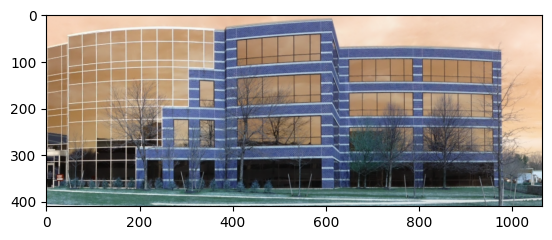

In [21]:
# Wenn status 0 == opencv hat die Bilder problemlos geladen
if status == 0:
    stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10,cv2.BORDER_CONSTANT, (0, 0, 0))
    gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    mask = np.zeros(thresh.shape, dtype="uint8")
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
    minRect = mask.copy()
    sub = mask.copy()
    
    while cv2.countNonZero(sub) > 0:
        minRect = cv2.erode(minRect, None)
        sub = cv2.subtract(minRect, thresh)
        cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
    stitched = stitched[y:y + h, x:x + w]
    plt.imshow(stitched)
    cv2.imwrite("output_Stitching/stitched_image.png", stitched)
else:
    print("image stitching Fehler ({})".format(status))